SARIMAX Component (Linear Time Series Patterns):

Captures linear trends and seasonality

Handles autoregressive patterns (how past values influence future values)

Models moving average components (error terms' relationships)

Good at capturing regular, predictable patterns



Gradient Boosting Component (Non-linear Patterns):

Works on the residuals (errors) from SARIMAX

Captures complex interactions between features

Learns non-linear relationships

Adapts to local patterns that SARIMAX might miss


Why This Combination Works:

SARIMAX handles the "big picture" time series patterns

GradientBoosting catches the subtle patterns in the errors

Together they provide more accurate predictions than either model alone



Advantages of this Approach:

Better handling of both linear and non-linear patterns
More robust to different types of data patterns
Can capture both long-term trends and short-term fluctuations
Provides interpretability through component analysis

## Fine tuning process, it will run 100 trails, which take a long time, so you can skip this cell, and only use the best hyperparametes to run next cell. To improve the performance, you could increase the trial count and the number of cross-validation folds to explore a wider parameter space, but it will take longer time.


Loading data...
Checking and preprocessing data...
Preparing data and engineering features...
Creating advanced features...
Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods


[I 2024-11-22 21:37:41,129] A new study created in memory with name: no-name-82b05a25-bdbd-42f0-81e2-981bf95c8c85


Scaling features...

Starting hyperparameter tuning...


[I 2024-11-22 21:41:29,237] Trial 0 finished with value: 548242872411.8613 and parameters: {'p': 4, 'd': 0, 'q': 4, 'n_estimators': 223, 'learning_rate': 0.08759899875152828, 'max_depth': 4, 'subsample': 0.652297282624934, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 0 with value: 548242872411.8613.
[I 2024-11-22 21:44:25,843] Trial 1 finished with value: 1757088707338.238 and parameters: {'p': 5, 'd': 1, 'q': 2, 'n_estimators': 148, 'learning_rate': 0.20642946793781494, 'max_depth': 3, 'subsample': 0.6991995463832623, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 0 with value: 548242872411.8613.
[I 2024-11-22 21:47:58,814] Trial 2 finished with value: 1241934421620.1465 and parameters: {'p': 2, 'd': 2, 'q': 5, 'n_estimators': 161, 'learning_rate': 0.08043850328299938, 'max_depth': 2, 'subsample': 0.9431414665027094, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 548242872411.8613.
[I 2024-11-22 21:52:17,402] Trial 3 finis


Best hyperparameters:
p: 3
d: 0
q: 4
n_estimators: 275
learning_rate: 0.27060319817764034
max_depth: 12
subsample: 0.6071488614858613
min_samples_split: 21
min_samples_leaf: 1

Best MAPE: 548242872409.1891%

Running cross-validation with best parameters...

Training fold 1/5

Fold 1 Metrics:
MAE: 4.1746
RMSE: 4.5647
R²: -0.5211
MAPE: 30.4323%
Directional Accuracy: 25.1748%
Theil's U: 0.6216


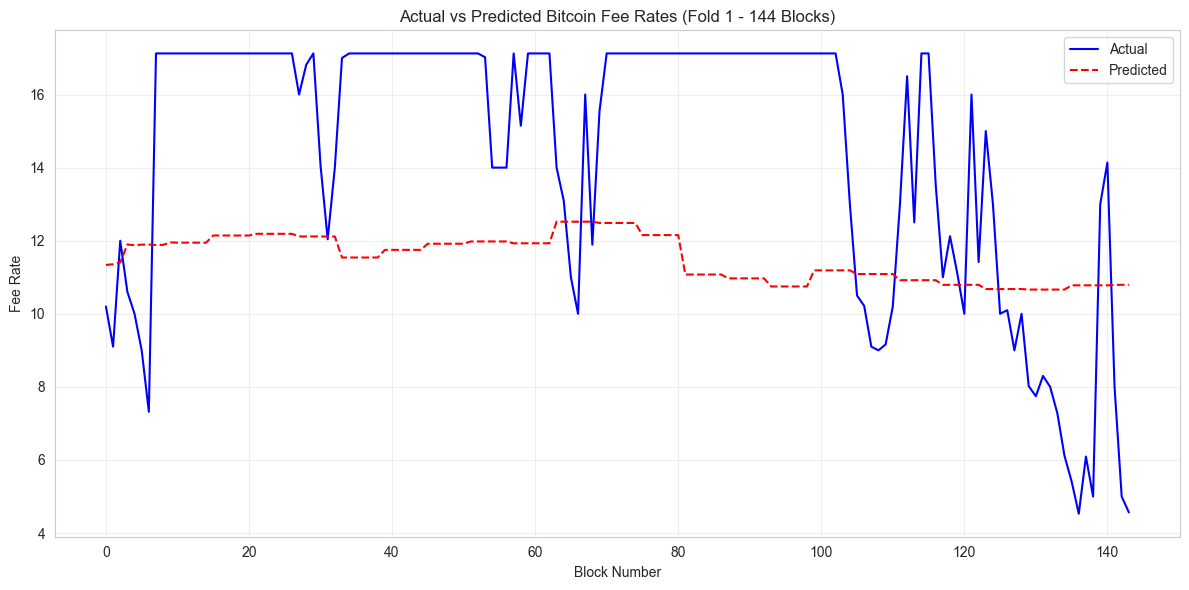


Training fold 2/5

Fold 2 Metrics:
MAE: 6.5821
RMSE: 7.6814
R²: -2.2628
MAPE: 49.7368%
Directional Accuracy: 40.5594%
Theil's U: 0.6876


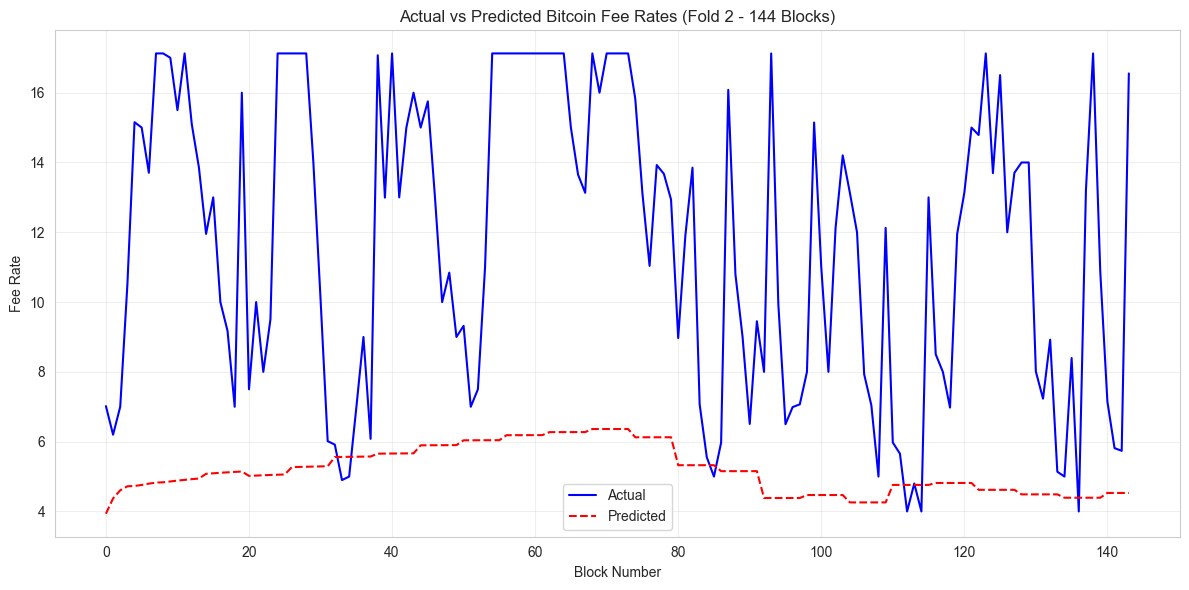


Training fold 3/5

Fold 3 Metrics:
MAE: 2.5407
RMSE: 3.2068
R²: 0.0512
MAPE: 29.4096%
Directional Accuracy: 53.1469%
Theil's U: 0.5093


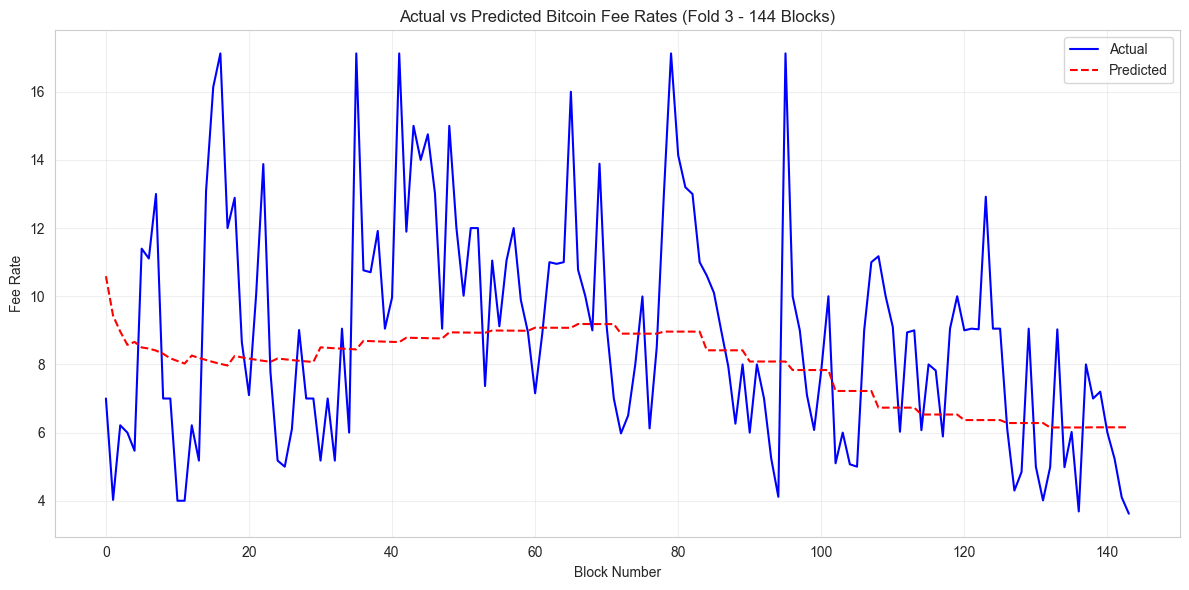


Training fold 4/5

Fold 4 Metrics:
MAE: 2.8572
RMSE: 3.9840
R²: -0.8798
MAPE: 37.4459%
Directional Accuracy: 42.6573%
Theil's U: 0.6651


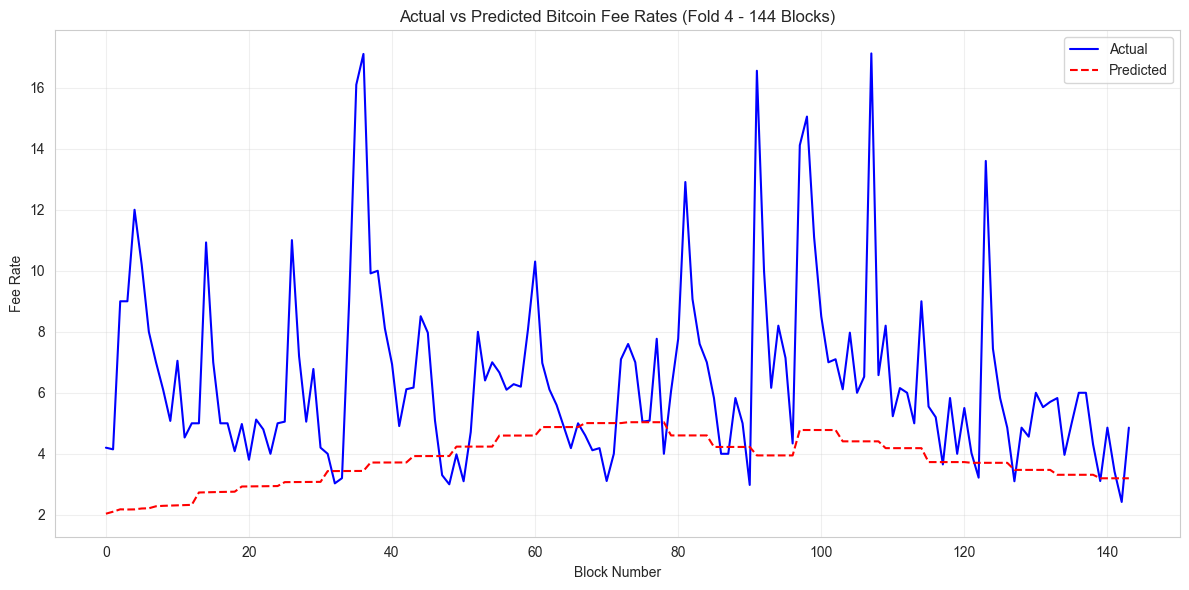


Training fold 5/5

Fold 5 Metrics:
MAE: 2.7801
RMSE: 3.8117
R²: -0.1993
MAPE: 47.6441%
Directional Accuracy: 50.3497%
Theil's U: 0.5772


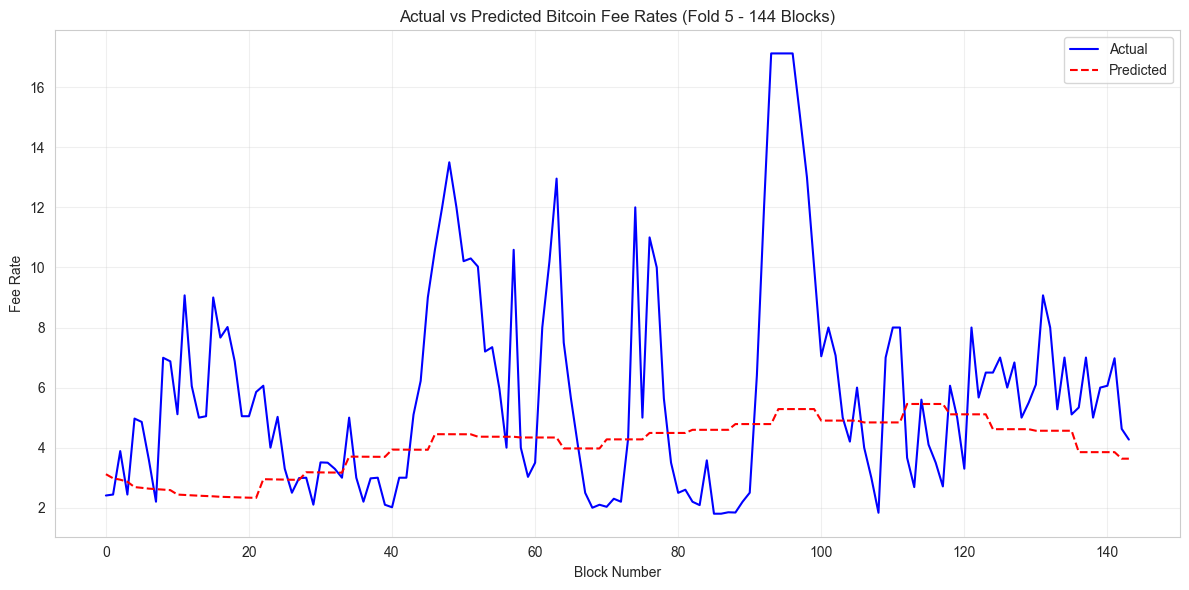

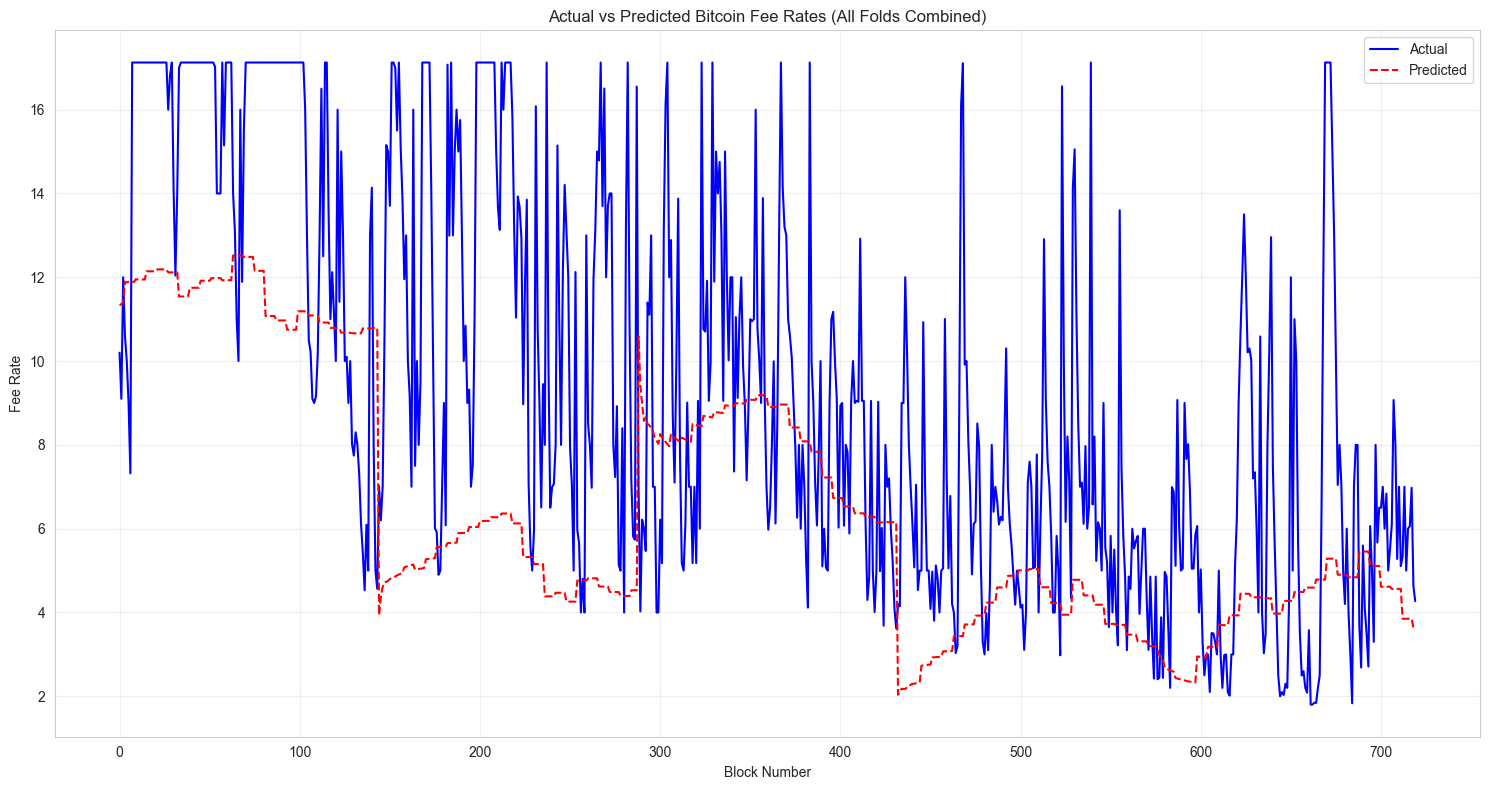


Detailed metrics for each fold:
   Fold       MAE      RMSE        R2       MAPE  DirectionalAccuracy  \
0     1  4.174646  4.564733 -0.521114  30.432309            25.174825   
1     2  6.582118  7.681437 -2.262813  49.736783            40.559441   
2     3  2.540693  3.206838  0.051245  29.409583            53.146853   
3     4  2.857221  3.983952 -0.879788  37.445944            42.657343   
4     5  2.780098  3.811680 -0.199278  47.644071            50.349650   

    TheilsU  
0  0.621610  
1  0.687583  
2  0.509331  
3  0.665136  
4  0.577240  

Final Cross-Validation Performance with Tuned Parameters:
MAE: 3.7870 (±1.5096)
RMSE: 4.6497 (±1.5765)
R2: -0.7623 (±0.8127)
MAPE: 38.9337 (±8.4590)
DA: 42.3776 (±9.7862)
THEIL_U: 0.6122 (±0.0638)

Total execution time: 35730.52 seconds

Saving results...
Results saved successfully!


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import time
import random
import ast
import optuna
import warnings
from copy import deepcopy

# Suppress warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)

def preprocess_and_check_data(df):
    """Preprocess and validate data"""
    print("Checking and preprocessing data...")
    
    # Check for NaN values
    if df.isnull().any().any():
        print("Warning: NaN values found in data")
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Check for infinite values
    if np.isinf(df.select_dtypes(include=np.number)).any().any():
        print("Warning: Infinite values found in data")
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Ensure target variable is positive (for MAPE calculation)
    if (df['block_median_fee_rate'] <= 0).any():
        print("Warning: Non-positive values found in target variable")
        df = df[df['block_median_fee_rate'] > 0]
    
    return df
    
def preprocess_list_columns(df):
    """Convert string representations of lists to actual numerical features"""
    list_columns = []
    
    # Identify columns containing lists
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                if isinstance(ast.literal_eval(df[col].iloc[0]), list):
                    list_columns.append(col)
            except (ValueError, SyntaxError):
                continue
    
    # Process list columns
    for col in list_columns:
        try:
            # Convert string representations to actual lists
            lists = df[col].apply(ast.literal_eval)
            
            # Create new features from lists
            df[f'{col}_mean'] = lists.apply(lambda x: np.mean(x))
            df[f'{col}_std'] = lists.apply(lambda x: np.std(x))
            df[f'{col}_max'] = lists.apply(lambda x: max(x))
            df[f'{col}_min'] = lists.apply(lambda x: min(x))
            df[f'{col}_range'] = lists.apply(lambda x: max(x) - min(x))
            df[f'{col}_sum'] = lists.apply(lambda x: sum(x))
            
            # Drop the original list column
            df = df.drop(columns=[col])
        except Exception as e:
            print(f"Warning: Error processing list column {col}: {str(e)}")
            continue
    
    return df

def create_advanced_features(df):
    """Create advanced features including time-based and rolling statistics"""
    print("Creating advanced features...")
    
    try:
        # First preprocess any list columns
        df = preprocess_list_columns(df)
        
        # Time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
        df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
        df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
        
        # Get numerical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        # Calculate block interval
        avg_interval = df.index.to_series().diff().mean().total_seconds() / 60
        BLOCK_INTERVAL_MINUTES = round(avg_interval)
        TIME_WINDOWS_HOURS = [1, 2, 4]  # Desired time windows in hours
        
        # Calculate windows based on actual data frequency
        windows = [int((60 * hours) / BLOCK_INTERVAL_MINUTES) for hours in TIME_WINDOWS_HOURS]
        print(f"Using rolling windows of {windows} blocks for {TIME_WINDOWS_HOURS} hour periods")
        
        # Rolling statistics for numerical columns
        for col in numeric_cols:
            if col != 'block_median_fee_rate':  # Skip target variable
                for window, hours in zip(windows, TIME_WINDOWS_HOURS):
                    df[f'{col}_mean_{hours}h'] = df[col].rolling(window=window, min_periods=1).mean()
                    df[f'{col}_std_{hours}h'] = df[col].rolling(window=window, min_periods=1).std()
        
        # Feature interactions
        if 'mempool_size_mb' in df.columns and 'transaction_count' in df.columns:
            df['mempool_pressure'] = df['mempool_size_mb'] * df['transaction_count']
        
        if 'bitcoin_price_usd' in df.columns:
            df['price_volatility'] = df['bitcoin_price_usd'].pct_change().rolling(12, min_periods=1).std()
        
        # Fill NaN values
        for col in df.columns:
            if col.endswith(('_mean', '_std', '_volatility')):
                df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
            else:
                df[col] = df[col].fillna(df[col].mean())
        
        return df
    
    except Exception as e:
        print(f"Error in feature creation: {str(e)}")
        raise

def forecast_exog_advanced(X, steps):
    """Forecast exogenous variables for future predictions"""
    try:
        forecast = pd.DataFrame(index=pd.date_range(start=X.index[-1] + pd.Timedelta(minutes=10), 
                                                  periods=steps, freq='10T'))
        
        for col in X.columns:
            if col.startswith(('hour_', 'day_')):
                if 'hour_' in col:
                    hour = forecast.index.hour
                    forecast[col] = np.sin(2 * np.pi * hour / 24) if 'sin' in col else np.cos(2 * np.pi * hour / 24)
                else:
                    day = forecast.index.dayofweek
                    forecast[col] = np.sin(2 * np.pi * day / 7) if 'sin' in col else np.cos(2 * np.pi * day / 7)
            else:
                # Use exponential smoothing for numerical features
                alpha = 0.7
                last_values = X[col].iloc[-10:]
                smoothed_value = last_values.ewm(alpha=alpha).mean().iloc[-1]
                forecast[col] = smoothed_value
        
        return forecast
    
    except Exception as e:
        print(f"Error in forecasting exogenous variables: {str(e)}")
        raise

class HybridModel:
    """Hybrid model combining SARIMAX and Gradient Boosting"""
    def __init__(self, sarimax_order=(1,1,1), gb_params=None):
        self.sarimax_order = sarimax_order
        self.sarimax_model = None
        
        default_gb_params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 3,
            'subsample': 0.8,
            'random_state': 42
        }
        
        if gb_params is not None:
            default_gb_params.update(gb_params)
            
        self.gb_model = GradientBoostingRegressor(**default_gb_params)
        
    def fit(self, y, exog):
        try:
            # Convert to numpy arrays
            y = np.array(y)
            exog = np.array(exog)
            
            # Fit SARIMAX
            self.sarimax_model = SARIMAX(y, exog=exog, order=self.sarimax_order)
            self.sarimax_results = self.sarimax_model.fit(disp=False)
            
            # Get SARIMAX residuals
            sarimax_pred = self.sarimax_results.get_prediction(start=0, exog=exog)
            residuals = y - sarimax_pred.predicted_mean
            
            # Check for NaN values
            if np.any(np.isnan(residuals)):
                raise ValueError("NaN values in SARIMAX residuals")
            
            # Fit GradientBoosting on residuals
            self.gb_model.fit(exog, residuals)
            
        except Exception as e:
            print(f"Error in model fitting: {str(e)}")
            raise
        
    def predict(self, exog):
        try:
            sarimax_pred = self.sarimax_results.get_prediction(
                start=len(self.sarimax_results.fittedvalues), 
                end=len(self.sarimax_results.fittedvalues) + len(exog) - 1,
                exog=exog
            )
            gb_pred = self.gb_model.predict(exog)
            return sarimax_pred.predicted_mean + gb_pred
        
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            raise

class HybridModelTuner:
    """Hyperparameter tuner for the hybrid model"""
    def __init__(self, y, exog, cv_splits=5):
        self.y = y
        self.exog = exog
        self.cv_splits = cv_splits
        self.best_params = None
        self.best_score = float('inf')
        
    def objective(self, trial):
        try:
            # SARIMAX parameters
            sarimax_order = (
                trial.suggest_int('p', 0,5),
                trial.suggest_int('d', 0, 2),
                trial.suggest_int('q', 0, 5)
            )
            
            # GradientBoosting parameters
            gb_params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
                'max_depth': trial.suggest_int('max_depth', 2, 12),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15)
            }
            
            # Time series cross-validation
            tscv = TimeSeriesSplit(n_splits=self.cv_splits)
            scores = []
            
            for train_idx, val_idx in tscv.split(self.exog):
                # Initialize model with trial parameters
                model = HybridModel(sarimax_order=sarimax_order, gb_params=gb_params)
                
                # Fit and predict
                train_y = self.y.iloc[train_idx]
                train_X = self.exog.iloc[train_idx]
                val_y = self.y.iloc[val_idx]
                val_X = self.exog.iloc[val_idx]
                
                model.fit(train_y, train_X)
                predictions = model.predict(val_X)
                
                # Ensure predictions and val_y are numpy arrays
                predictions = np.array(predictions).astype(float)
                val_y = np.array(val_y).astype(float)
                
                # Check for NaN values
                if np.any(np.isnan(predictions)) or np.any(np.isnan(val_y)):
                    return float('inf')
                
                # Calculate error
                mape = mean_absolute_percentage_error(val_y, predictions)
                
                if np.isfinite(mape):
                    scores.append(mape)
            
            if len(scores) == 0:
                return float('inf')
                
            mean_score = np.mean(scores)
            return mean_score if np.isfinite(mean_score) else float('inf')
            
        except Exception as e:
            print(f"Trial failed with error: {str(e)}")
            return float('inf')
    
    def tune(self, n_trials=100):
        try:
            study = optuna.create_study(direction='minimize')
            study.optimize(self.objective, n_trials=n_trials)
            
            if study.best_trial is None:
                raise ValueError("No successful trials completed")
            
            self.best_params = study.best_params
            self.best_score = study.best_value
            
            return study
            
        except Exception as e:
            print(f"Error in hyperparameter tuning: {str(e)}")
            raise

# Evaluation Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error with proper handling of types"""
    y_true = np.array(y_true).astype(float)
    y_pred = np.array(y_pred).astype(float)
    
    # Handle division by zero
    mask = y_true != 0
    if not np.any(mask):
        return float('inf')
    
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def directional_accuracy(y_true, y_pred):
    """Calculate Directional Accuracy"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((np.diff(y_true) * np.diff(y_pred)) > 0) * 100

def theil_u(y_true, y_pred):
    """Calculate Theil's U statistic"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    y_true_pct = (y_true[1:] - y_true[:-1]) / y_true[:-1]
    y_pred_pct = (y_pred[1:] - y_true[:-1]) / y_true[:-1]
    
    numerator = np.sqrt(np.mean((y_true_pct - y_pred_pct)**2))
    denominator = np.sqrt(np.mean(y_true_pct**2)) + np.sqrt(np.mean(y_pred_pct**2))
    
    return numerator / denominator


# Plotting Functions
def plot_fold_results(y_true, y_pred, fold_idx):
    """Plot results for a single fold"""
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_true)), y_true, label='Actual', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Bitcoin Fee Rates (Fold {fold_idx + 1} - 144 Blocks)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_all_folds(all_y_true, all_y_pred):
    """Plot results for all folds combined"""
    plt.figure(figsize=(15, 8))
    plt.plot(range(len(all_y_true)), all_y_true, label='Actual', color='blue')
    plt.plot(range(len(all_y_pred)), all_y_pred, label='Predicted', color='red', linestyle='--')
    plt.title('Actual vs Predicted Bitcoin Fee Rates (All Folds Combined)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def run_improved_model_with_tuning(df, test_size=144, n_splits=5, n_trials=50):
    """Main function to run the improved model with hyperparameter tuning"""
    try:
        # Prepare data
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        # Scale features
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Tune hyperparameters
        print("\nStarting hyperparameter tuning...")
        tuner = HybridModelTuner(y, X_scaled)
        study = tuner.tune(n_trials=n_trials)
        
        print("\nBest hyperparameters:")
        for param, value in study.best_params.items():
            print(f"{param}: {value}")
        print(f"\nBest MAPE: {study.best_value:.4f}%")
        
        # Extract best parameters
        best_sarimax_order = (
            study.best_params['p'],
            study.best_params['d'],
            study.best_params['q']
        )
        
        best_gb_params = {
            'n_estimators': study.best_params['n_estimators'],
            'learning_rate': study.best_params['learning_rate'],
            'max_depth': study.best_params['max_depth'],
            'subsample': study.best_params['subsample'],
            'min_samples_split': study.best_params['min_samples_split'],
            'min_samples_leaf': study.best_params['min_samples_leaf']
        }
        
        # Run cross-validation with best parameters
        print("\nRunning cross-validation with best parameters...")
        metrics = {metric: [] for metric in ['mae', 'rmse', 'r2', 'mape', 'da', 'theil_u']}
        all_y_true = []
        all_y_pred = []
        
        n_total = len(X_scaled)
        for fold_idx in range(n_splits):
            print(f"\nTraining fold {fold_idx+1}/{n_splits}")
            
            train_end = n_total - (n_splits - fold_idx) * test_size
            test_start = train_end
            test_end = test_start + test_size
            
            # Split data
            train_X = X_scaled.iloc[:train_end]
            train_y = y.iloc[:train_end]
            test_y = y.iloc[test_start:test_end]
            
            # Initialize and fit model with best parameters
            model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
            model.fit(train_y, train_X)
            
            # Generate forecasts
            future_exog = forecast_exog_advanced(train_X, test_size)
            predictions = model.predict(future_exog)
            
            # Store and evaluate results
            y_true = test_y.values[:test_size]
            y_pred = predictions[:test_size]
            
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            
            # Calculate metrics
            metrics['mae'].append(mean_absolute_error(y_true, y_pred))
            metrics['rmse'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
            metrics['r2'].append(r2_score(y_true, y_pred))
            metrics['mape'].append(mean_absolute_percentage_error(y_true, y_pred))
            metrics['da'].append(directional_accuracy(y_true, y_pred))
            metrics['theil_u'].append(theil_u(y_true, y_pred))
            
            # Print metrics for current fold
            print(f"\nFold {fold_idx + 1} Metrics:")
            print(f"MAE: {metrics['mae'][-1]:.4f}")
            print(f"RMSE: {metrics['rmse'][-1]:.4f}")
            print(f"R²: {metrics['r2'][-1]:.4f}")
            print(f"MAPE: {metrics['mape'][-1]:.4f}%")
            print(f"Directional Accuracy: {metrics['da'][-1]:.4f}%")
            print(f"Theil's U: {metrics['theil_u'][-1]:.4f}")
            
            # Plot results for current fold
            plot_fold_results(y_true, y_pred, fold_idx)
        
        # Plot all folds combined
        plot_all_folds(all_y_true, all_y_pred)
        
        # Create DataFrame with metrics for each fold
        metrics_df = pd.DataFrame({
            'Fold': range(1, n_splits + 1),
            'MAE': metrics['mae'],
            'RMSE': metrics['rmse'],
            'R2': metrics['r2'],
            'MAPE': metrics['mape'],
            'DirectionalAccuracy': metrics['da'],
            'TheilsU': metrics['theil_u']
        })
        
        print("\nDetailed metrics for each fold:")
        print(metrics_df)
        
        # Print final results
        print("\nFinal Cross-Validation Performance with Tuned Parameters:")
        for metric, values in metrics.items():
            print(f"{metric.upper()}: {np.mean(values):.4f} (±{np.std(values):.4f})")
        
        return metrics, all_y_true, all_y_pred, study, metrics_df
    
    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv('real_time_cleaned.csv')
        df['block_time'] = pd.to_datetime(df['block_time'])
        df = df.sort_values('block_time').set_index('block_time')
        
        # Preprocess data
        df = preprocess_and_check_data(df)

        # Set random seed and start timer
        set_seed(42)
        start = time.time()

        # Run the improved model with tuning
        n_trials = 100  # Number of hyperparameter optimization trials
        metrics, all_y_true, all_y_pred, study, metrics_df = run_improved_model_with_tuning(
            df, 
            test_size=144, 
            n_splits=5,
            n_trials=n_trials
        )

        # Print execution time
        end = time.time()
        print(f"\nTotal execution time: {end-start:.2f} seconds")

        # Save results
        print("\nSaving results...")
        
        # Save best parameters
        best_params = pd.DataFrame([study.best_params])
        best_params.to_csv('best_parameters.csv', index=False)
        
        # Save metrics
        metrics_df.to_csv('cross_validation_metrics.csv', index=False)
        
        # Save predictions
        predictions_df = pd.DataFrame({
            'actual': all_y_true,
            'predicted': all_y_pred
        })
        predictions_df.to_csv('predictions.csv', index=False)
        
        print("Results saved successfully!")
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise



50 trails :
Best hyperparameters:
p: 3
d: 0
q: 1
n_estimators: 145
learning_rate: 0.1477904886684632
max_depth: 2
subsample: 0.8044950252252036
min_samples_split: 6
min_samples_leaf: 4



500 trails:
Final Cross-Validation Performance with Tuned Parameters:
MAE: 2.7877 (±0.5538)
RMSE: 3.6280 (±0.5082)
R2: -0.0633 (±0.1615)
MAPE: 44.0066 (±18.3010)
DA: 26.2937 (±7.8446)
THEIL_U: 0.5798 


100 trails: 
Best hyperparameters:
p: 3
d: 0
q: 4
n_estimators: 275
learning_rate: 0.27060319817764034
max_depth: 12
subsample: 0.6071488614858613
min_samples_split: 21
min_samples_leaf: 1
Final Cross-Validation Performance with Tuned Parameters:
MAE: 3.7870 (±1.5096)
RMSE: 4.6497 (±1.5765)
R2: -0.7623 (±0.8127)
MAPE: 38.9337 (±8.4590)
DA: 42.3776 (±9.7862)
THEIL_U: 0.6122 (±0.0638)

## Cross Validation with Best Hypeparameters

Loading data...
Checking and preprocessing data...
Preparing data and engineering features...
Creating advanced features...
Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods
Scaling features...

Running cross-validation with best parameters...

Training fold 1/5

Fold 1 Metrics:
MAE: 4.1746
RMSE: 4.5647
R²: -0.5211
MAPE: 30.4323%
Directional Accuracy: 25.1748%
Theil's U: 0.6216


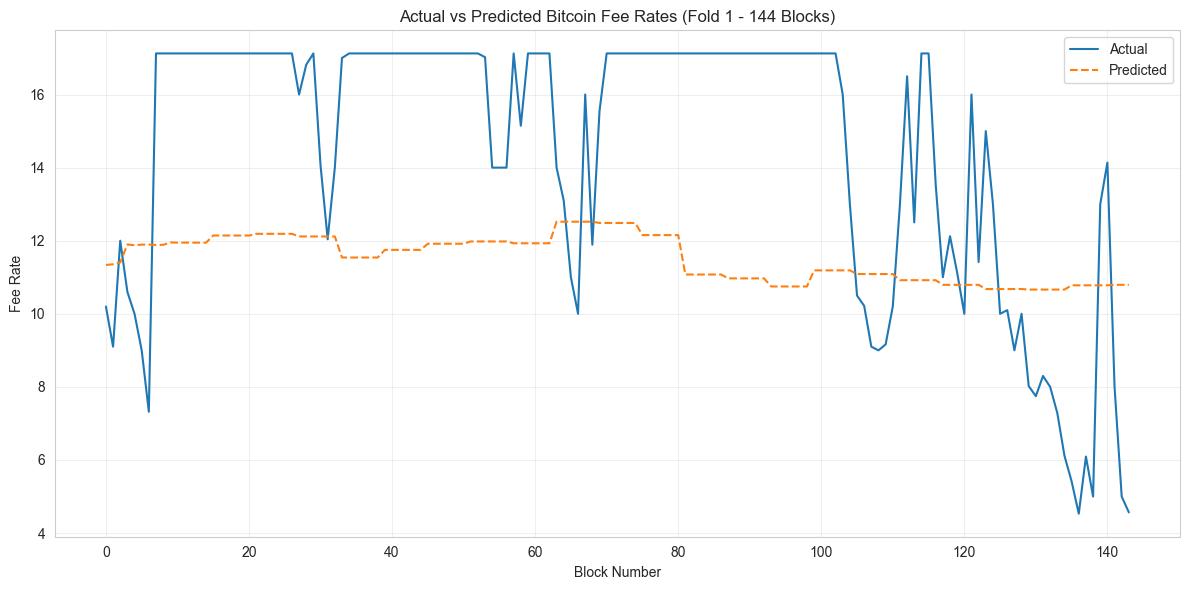


Training fold 2/5

Fold 2 Metrics:
MAE: 6.5821
RMSE: 7.6814
R²: -2.2628
MAPE: 49.7368%
Directional Accuracy: 40.5594%
Theil's U: 0.6876


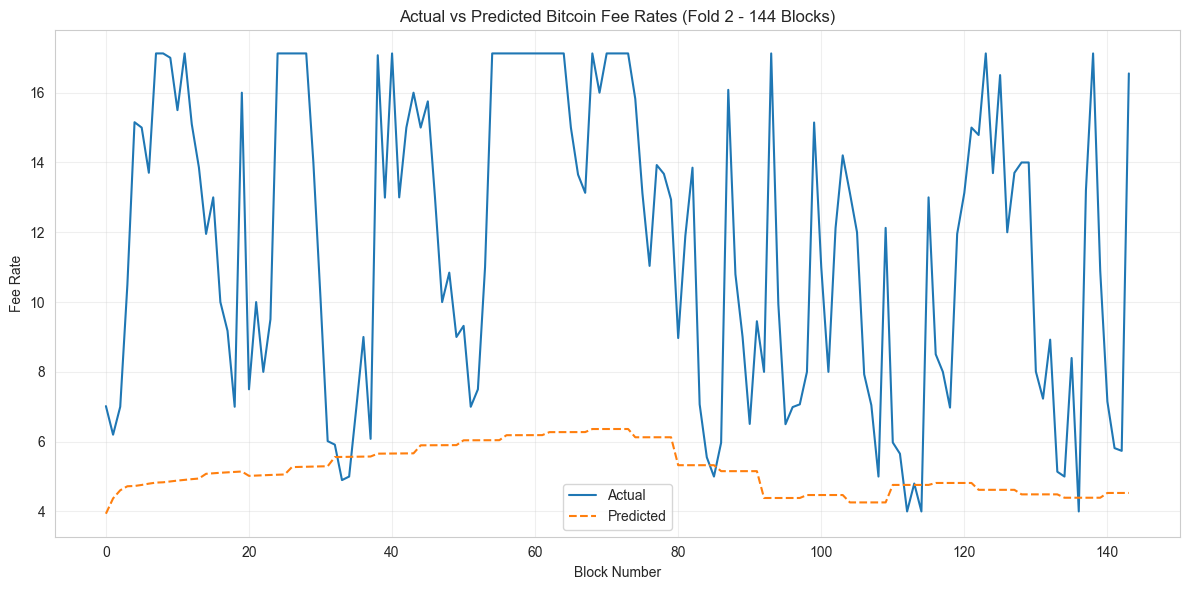


Training fold 3/5

Fold 3 Metrics:
MAE: 2.5407
RMSE: 3.2068
R²: 0.0512
MAPE: 29.4096%
Directional Accuracy: 53.1469%
Theil's U: 0.5093


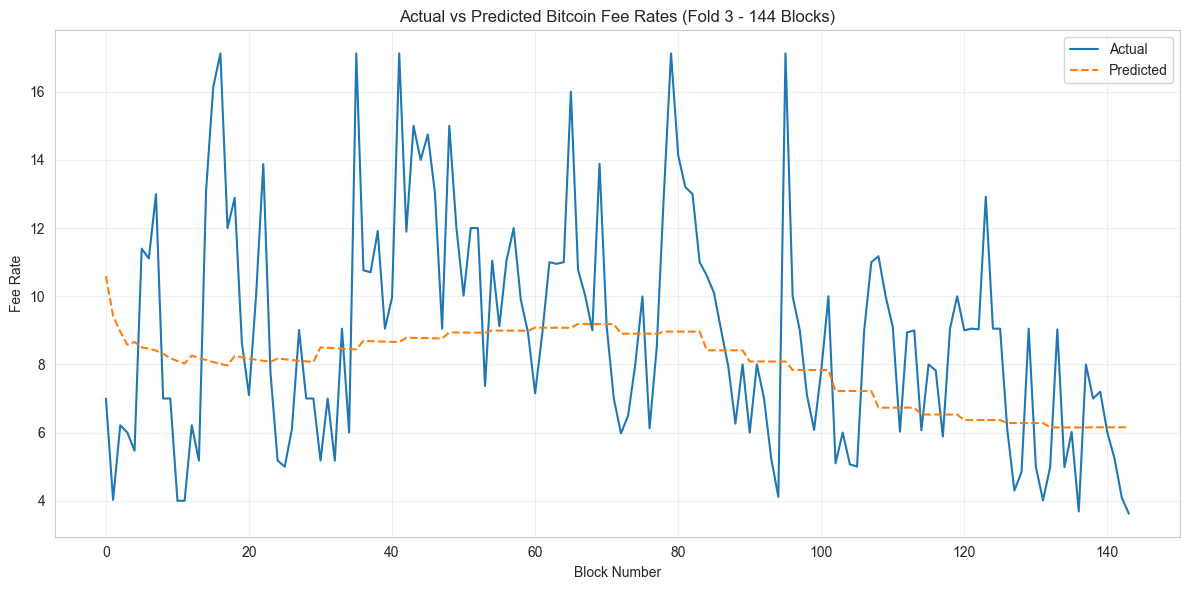


Training fold 4/5

Fold 4 Metrics:
MAE: 2.8572
RMSE: 3.9840
R²: -0.8798
MAPE: 37.4459%
Directional Accuracy: 42.6573%
Theil's U: 0.6651


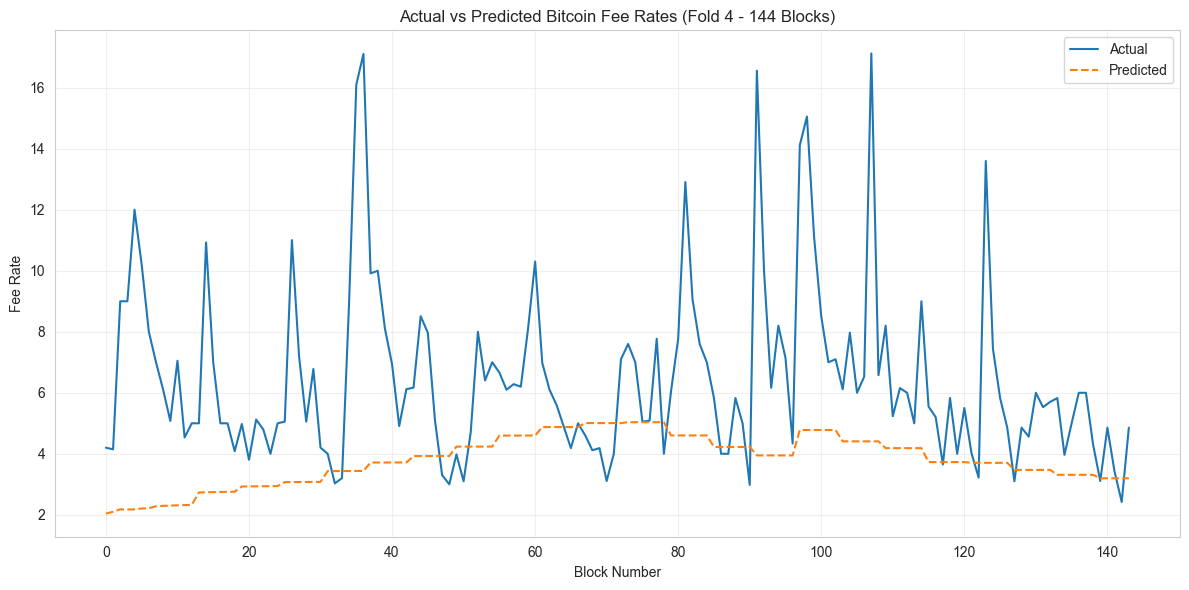


Training fold 5/5

Fold 5 Metrics:
MAE: 2.7801
RMSE: 3.8117
R²: -0.1993
MAPE: 47.6441%
Directional Accuracy: 50.3497%
Theil's U: 0.5772


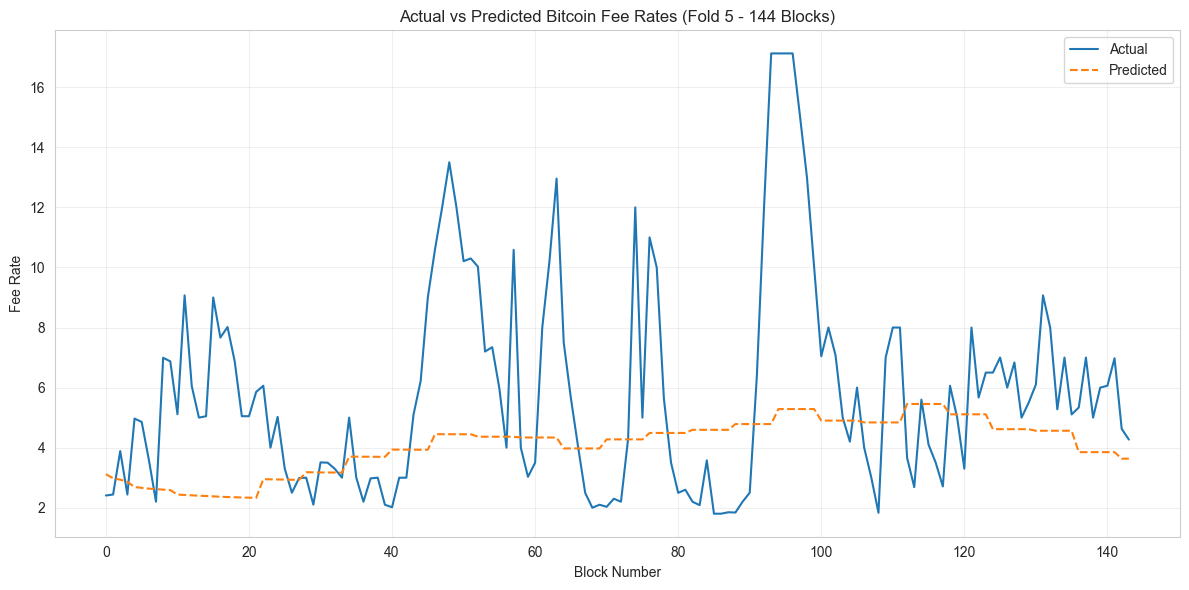

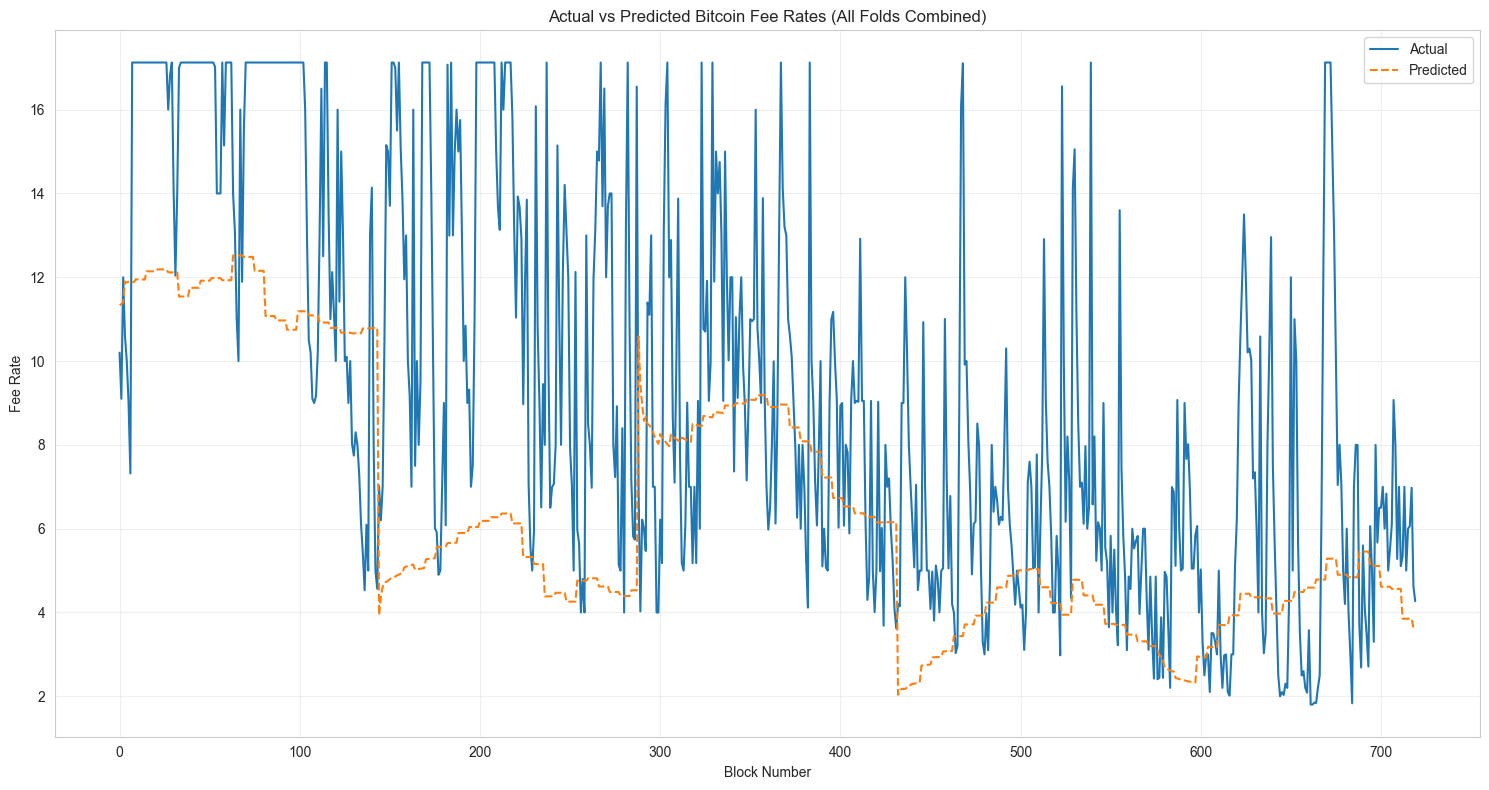


Detailed metrics for each fold:
   Fold       MAE      RMSE        R2       MAPE  DirectionalAccuracy  \
0     1  4.174646  4.564733 -0.521114  30.432309            25.174825   
1     2  6.582118  7.681437 -2.262813  49.736783            40.559441   
2     3  2.540693  3.206838  0.051245  29.409583            53.146853   
3     4  2.857221  3.983952 -0.879788  37.445944            42.657343   
4     5  2.780098  3.811680 -0.199278  47.644071            50.349650   

    TheilsU  
0  0.621610  
1  0.687583  
2  0.509331  
3  0.665136  
4  0.577240  

Final Cross-Validation Performance with Best Parameters:
MAE: 3.7870 (±1.5096)
RMSE: 4.6497 (±1.5765)
R2: -0.7623 (±0.8127)
MAPE: 38.9337 (±8.4590)
DA: 42.3776 (±9.7862)
THEIL_U: 0.6122 (±0.0638)

Total execution time: 826.10 seconds

Saving results...
Results saved successfully!


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import time
import random
import ast
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)

def preprocess_and_check_data(df):
    """Preprocess and validate data"""
    print("Checking and preprocessing data...")
    
    # Check for NaN values
    if df.isnull().any().any():
        print("Warning: NaN values found in data")
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Check for infinite values
    if np.isinf(df.select_dtypes(include=np.number)).any().any():
        print("Warning: Infinite values found in data")
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Ensure target variable is positive (for MAPE calculation)
    if (df['block_median_fee_rate'] <= 0).any():
        print("Warning: Non-positive values found in target variable")
        df = df[df['block_median_fee_rate'] > 0]
    
    return df
    
def preprocess_list_columns(df):
    """Convert string representations of lists to actual numerical features"""
    list_columns = []
    
    # Identify columns containing lists
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                if isinstance(ast.literal_eval(df[col].iloc[0]), list):
                    list_columns.append(col)
            except (ValueError, SyntaxError):
                continue
    
    # Process list columns
    for col in list_columns:
        try:
            # Convert string representations to actual lists
            lists = df[col].apply(ast.literal_eval)
            
            # Create new features from lists
            df[f'{col}_mean'] = lists.apply(lambda x: np.mean(x))
            df[f'{col}_std'] = lists.apply(lambda x: np.std(x))
            df[f'{col}_max'] = lists.apply(lambda x: max(x))
            df[f'{col}_min'] = lists.apply(lambda x: min(x))
            df[f'{col}_range'] = lists.apply(lambda x: max(x) - min(x))
            df[f'{col}_sum'] = lists.apply(lambda x: sum(x))
            
            # Drop the original list column
            df = df.drop(columns=[col])
        except Exception as e:
            print(f"Warning: Error processing list column {col}: {str(e)}")
            continue
    
    return df

def create_advanced_features(df):
    """Create advanced features including time-based and rolling statistics"""
    print("Creating advanced features...")
    
    try:
        # First preprocess any list columns
        df = preprocess_list_columns(df)
        
        # Time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
        df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
        df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
        
        # Get numerical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        # Calculate block interval
        avg_interval = df.index.to_series().diff().mean().total_seconds() / 60
        BLOCK_INTERVAL_MINUTES = round(avg_interval)
        TIME_WINDOWS_HOURS = [1, 2, 4]  # Desired time windows in hours
        
        # Calculate windows based on actual data frequency
        windows = [int((60 * hours) / BLOCK_INTERVAL_MINUTES) for hours in TIME_WINDOWS_HOURS]
        print(f"Using rolling windows of {windows} blocks for {TIME_WINDOWS_HOURS} hour periods")
        
        # Rolling statistics for numerical columns
        for col in numeric_cols:
            if col != 'block_median_fee_rate':  # Skip target variable
                for window, hours in zip(windows, TIME_WINDOWS_HOURS):
                    df[f'{col}_mean_{hours}h'] = df[col].rolling(window=window, min_periods=1).mean()
                    df[f'{col}_std_{hours}h'] = df[col].rolling(window=window, min_periods=1).std()
        
        # Feature interactions
        if 'mempool_size_mb' in df.columns and 'transaction_count' in df.columns:
            df['mempool_pressure'] = df['mempool_size_mb'] * df['transaction_count']
        
        if 'bitcoin_price_usd' in df.columns:
            df['price_volatility'] = df['bitcoin_price_usd'].pct_change().rolling(12, min_periods=1).std()
        
        # Fill NaN values
        for col in df.columns:
            if col.endswith(('_mean', '_std', '_volatility')):
                df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
            else:
                df[col] = df[col].fillna(df[col].mean())
        
        return df
    
    except Exception as e:
        print(f"Error in feature creation: {str(e)}")
        raise

def forecast_exog_advanced(X, steps):
    """Forecast exogenous variables for future predictions"""
    try:
        forecast = pd.DataFrame(index=pd.date_range(start=X.index[-1] + pd.Timedelta(minutes=10), 
                                                  periods=steps, freq='10T'))
        
        for col in X.columns:
            if col.startswith(('hour_', 'day_')):
                if 'hour_' in col:
                    hour = forecast.index.hour
                    forecast[col] = np.sin(2 * np.pi * hour / 24) if 'sin' in col else np.cos(2 * np.pi * hour / 24)
                else:
                    day = forecast.index.dayofweek
                    forecast[col] = np.sin(2 * np.pi * day / 7) if 'sin' in col else np.cos(2 * np.pi * day / 7)
            else:
                # Use exponential smoothing for numerical features
                alpha = 0.7
                last_values = X[col].iloc[-10:]
                smoothed_value = last_values.ewm(alpha=alpha).mean().iloc[-1]
                forecast[col] = smoothed_value
        
        return forecast
    
    except Exception as e:
        print(f"Error in forecasting exogenous variables: {str(e)}")
        raise
class HybridModel:
    """Hybrid model combining SARIMAX and Gradient Boosting"""
    def __init__(self, sarimax_order=(1,1,1), gb_params=None):
        self.sarimax_order = sarimax_order
        self.sarimax_model = None
        
        default_gb_params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 3,
            'subsample': 0.8,
            'random_state': 42
        }
          
        if gb_params is not None:
            default_gb_params.update(gb_params)
            
        self.gb_model = GradientBoostingRegressor(**default_gb_params)
        
    def fit(self, y, exog):
        try:
            # Convert to numpy arrays
            y = np.array(y)
            exog = np.array(exog)
            
            # Fit SARIMAX
            self.sarimax_model = SARIMAX(y, exog=exog, order=self.sarimax_order)
            self.sarimax_results = self.sarimax_model.fit(disp=False)
            
            # Get SARIMAX residuals
            sarimax_pred = self.sarimax_results.get_prediction(start=0, exog=exog)
            residuals = y - sarimax_pred.predicted_mean
            
            # Check for NaN values
            if np.any(np.isnan(residuals)):
                raise ValueError("NaN values in SARIMAX residuals")
            
            # Fit GradientBoosting on residuals
            self.gb_model.fit(exog, residuals)
            
        except Exception as e:
            print(f"Error in model fitting: {str(e)}")
            raise
        
    def predict(self, exog):
        try:
            sarimax_pred = self.sarimax_results.get_prediction(
                start=len(self.sarimax_results.fittedvalues), 
                end=len(self.sarimax_results.fittedvalues) + len(exog) - 1,
                exog=exog
            )
            gb_pred = self.gb_model.predict(exog)
            return sarimax_pred.predicted_mean + gb_pred
        
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            raise

# Evaluation Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error with proper handling of types"""
    y_true = np.array(y_true).astype(float)
    y_pred = np.array(y_pred).astype(float)
    
    # Handle division by zero
    mask = y_true != 0
    if not np.any(mask):
        return float('inf')
    
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def directional_accuracy(y_true, y_pred):
    """Calculate Directional Accuracy"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((np.diff(y_true) * np.diff(y_pred)) > 0) * 100

def theil_u(y_true, y_pred):
    """Calculate Theil's U statistic"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    y_true_pct = (y_true[1:] - y_true[:-1]) / y_true[:-1]
    y_pred_pct = (y_pred[1:] - y_true[:-1]) / y_true[:-1]
    
    numerator = np.sqrt(np.mean((y_true_pct - y_pred_pct)**2))
    denominator = np.sqrt(np.mean(y_true_pct**2)) + np.sqrt(np.mean(y_pred_pct**2))
    
    return numerator / denominator

# Plotting Functions
def plot_fold_results(y_true, y_pred, fold_idx):
    """Plot results for a single fold"""
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_true)), y_true, label='Actual')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted', linestyle='--')
    plt.title(f'Actual vs Predicted Bitcoin Fee Rates (Fold {fold_idx + 1} - 144 Blocks)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_all_folds(all_y_true, all_y_pred):
    """Plot results for all folds combined"""
    plt.figure(figsize=(15, 8))
    plt.plot(range(len(all_y_true)), all_y_true, label='Actual')
    plt.plot(range(len(all_y_pred)), all_y_pred, label='Predicted', linestyle='--')
    plt.title('Actual vs Predicted Bitcoin Fee Rates (All Folds Combined)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
def run_model_with_best_params(df, test_size=144, n_splits=5):
    """Run cross-validation with the best parameters found from previous tuning"""
    try:
        # Prepare data
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        # Scale features
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Best parameters from previous tuning
        # best_sarimax_order = (3, 0, 1)  # p, d, q
        best_sarimax_order = (3, 0, 4)
        
# p: 3
# d: 0
# q: 4
# n_estimators: 275
# learning_rate: 0.27060319817764034
# max_depth: 12
# subsample: 0.6071488614858613
# min_samples_split: 21
# min_samples_leaf: 1
        
        best_gb_params = {
            'n_estimators': 275,
            'learning_rate': 0.27060319817764034,
            'max_depth': 12,
            'subsample': 0.6071488614858613,
            'min_samples_split': 21,
            'min_samples_leaf': 1,
            'random_state': 42
        }      
        
        
        # Run cross-validation with best parameters
        print("\nRunning cross-validation with best parameters...")
        metrics = {metric: [] for metric in ['mae', 'rmse', 'r2', 'mape', 'da', 'theil_u']}
        all_y_true = []
        all_y_pred = []
        
        n_total = len(X_scaled)
        for fold_idx in range(n_splits):
            print(f"\nTraining fold {fold_idx+1}/{n_splits}")
            
            train_end = n_total - (n_splits - fold_idx) * test_size
            test_start = train_end
            test_end = test_start + test_size
            
            # Split data
            train_X = X_scaled.iloc[:train_end]
            train_y = y.iloc[:train_end]
            test_y = y.iloc[test_start:test_end]
            
            # Initialize and fit model with best parameters
            model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
            model.fit(train_y, train_X)
            
            # Generate forecasts
            future_exog = forecast_exog_advanced(train_X, test_size)
            predictions = model.predict(future_exog)
            
            # Store and evaluate results
            y_true = test_y.values[:test_size]
            y_pred = predictions[:test_size]
            
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            
            # Calculate metrics
            metrics['mae'].append(mean_absolute_error(y_true, y_pred))
            metrics['rmse'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
            metrics['r2'].append(r2_score(y_true, y_pred))
            metrics['mape'].append(mean_absolute_percentage_error(y_true, y_pred))
            metrics['da'].append(directional_accuracy(y_true, y_pred))
            metrics['theil_u'].append(theil_u(y_true, y_pred))
            
            # Print metrics for current fold
            print(f"\nFold {fold_idx + 1} Metrics:")
            print(f"MAE: {metrics['mae'][-1]:.4f}")
            print(f"RMSE: {metrics['rmse'][-1]:.4f}")
            print(f"R²: {metrics['r2'][-1]:.4f}")
            print(f"MAPE: {metrics['mape'][-1]:.4f}%")
            print(f"Directional Accuracy: {metrics['da'][-1]:.4f}%")
            print(f"Theil's U: {metrics['theil_u'][-1]:.4f}")
            
            # Plot results for current fold
            plot_fold_results(y_true, y_pred, fold_idx)
        
        # Plot all folds combined
        plot_all_folds(all_y_true, all_y_pred)
        
        # Create DataFrame with metrics for each fold
        metrics_df = pd.DataFrame({
            'Fold': range(1, n_splits + 1),
            'MAE': metrics['mae'],
            'RMSE': metrics['rmse'],
            'R2': metrics['r2'],
            'MAPE': metrics['mape'],
            'DirectionalAccuracy': metrics['da'],
            'TheilsU': metrics['theil_u']
        })
        
        print("\nDetailed metrics for each fold:")
        print(metrics_df)
        
        # Print final results
        print("\nFinal Cross-Validation Performance with Best Parameters:")
        for metric, values in metrics.items():
            print(f"{metric.upper()}: {np.mean(values):.4f} (±{np.std(values):.4f})")
        
        return metrics, all_y_true, all_y_pred, metrics_df
    
    except Exception as e:
        print(f"Error in model evaluation: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv('real_time_cleaned.csv')
        df['block_time'] = pd.to_datetime(df['block_time'])
        df = df.sort_values('block_time').set_index('block_time')
        
        # Preprocess data
        df = preprocess_and_check_data(df)

        # Set random seed and start timer
        set_seed(42)
        start = time.time()

        # Run cross-validation with best parameters
        metrics, all_y_true, all_y_pred, metrics_df = run_model_with_best_params(
            df, 
            test_size=144, 
            n_splits=5
        )

        # Print execution time
        end = time.time()
        print(f"\nTotal execution time: {end-start:.2f} seconds")

        # Save results
        print("\nSaving results...")
        
        # Save metrics
        metrics_df.to_csv('cross_validation_metrics_best_params.csv', index=False)
        
        # Save predictions
        predictions_df = pd.DataFrame({
            'actual': all_y_true,
            'predicted': all_y_pred
        })
        predictions_df.to_csv('predictions_best_params.csv', index=False)
        
        print("Results saved successfully!")
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

## Train the Model on the Entire Dataset to Predict the Next 144 Blocks and Compare with Actual Values


Loading data...
Preparing data and engineering features...
Creating advanced features...
Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods
Scaling features...

Training model on full dataset...

Generating predictions for next 144 blocks...


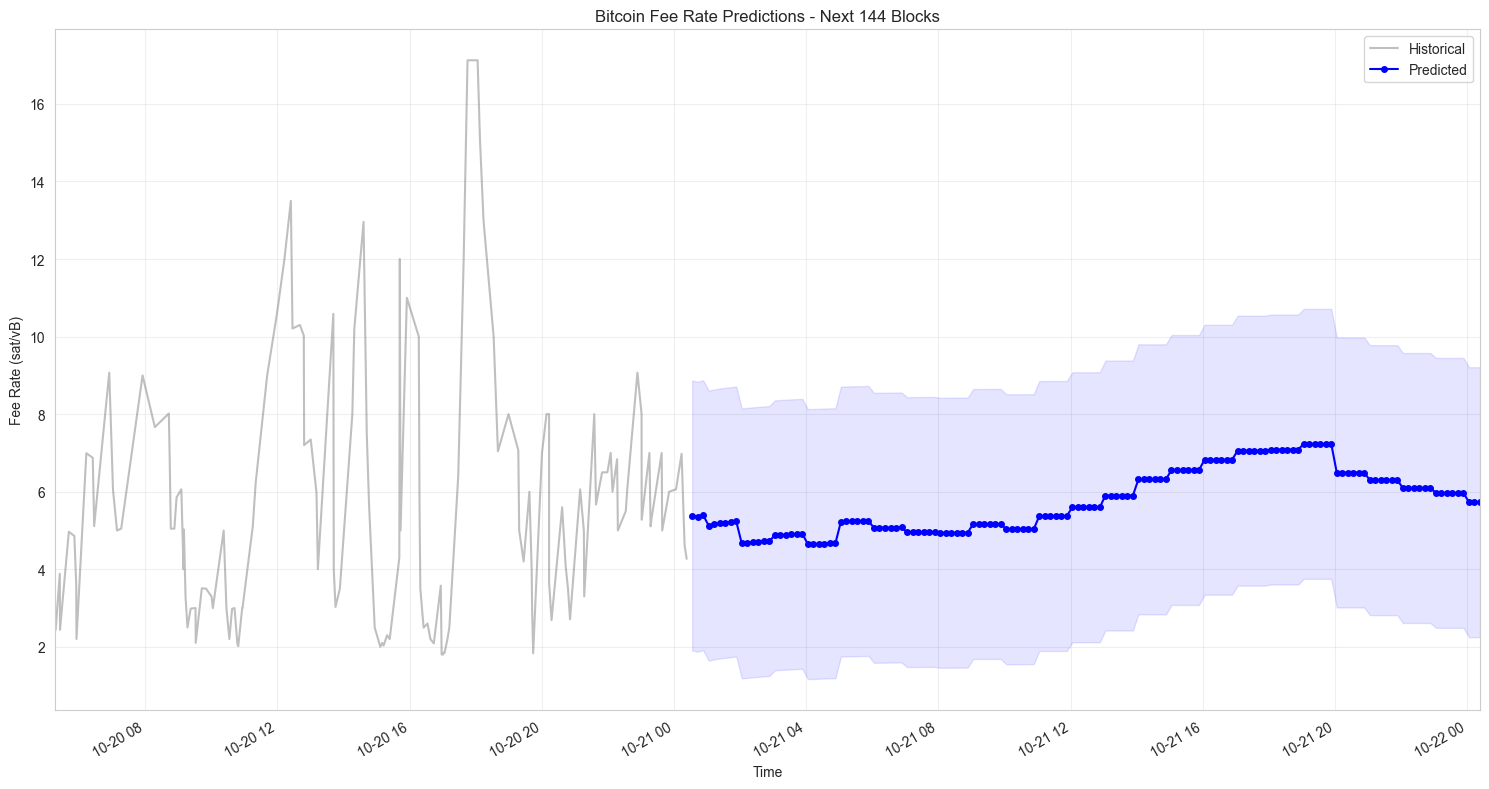


Prediction Statistics:
Mean predicted fee rate: 5.76 sat/vB
Min predicted fee rate: 4.65 sat/vB
Max predicted fee rate: 7.23 sat/vB

Predictions saved to 'future_fee_predictions.csv'

Prediction process completed in 184.03 seconds!


In [15]:
def predict_future_fees(df, prediction_blocks=144):
    """Train model on full dataset and predict future fee rates"""
    try:
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        
# p: 3
# d: 0
# q: 4
# n_estimators: 275
# learning_rate: 0.27060319817764034
# max_depth: 12
# subsample: 0.6071488614858613
# min_samples_split: 21
# min_samples_leaf: 1
        # Best parameters from previous tuning
        best_sarimax_order = (3, 0, 4)
        best_gb_params = {
            'n_estimators': 275,
            'learning_rate': 0.27060319817764034,
            'max_depth': 12,
            'subsample': 0.6071488614858613,
            'min_samples_split': 21,
            'min_samples_leaf': 1,
            'random_state': 42
        }
        
        print("\nTraining model on full dataset...")
        model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
        model.fit(y, X_scaled)
        
        print("\nGenerating predictions for next 144 blocks...")
        future_exog = forecast_exog_advanced(X_scaled, prediction_blocks)
        predictions = model.predict(future_exog)
        
        # Create DataFrame with predictions
        results_df = pd.DataFrame({
            'timestamp': future_exog.index,
            'predicted_fee_rate': predictions
        })
        
        # Plot predictions with historical context
        plt.figure(figsize=(15, 8))
        
        # Get the last 144 blocks for historical context
        historical_data = df.iloc[-144:].copy()
        historical_times = historical_data.index
        historical_values = historical_data[target]
        
        # Create proper timestamps for predictions
        last_time = historical_times[-1]
        prediction_times = pd.date_range(
            start=last_time,
            periods=prediction_blocks + 1,
            freq='10T'
        )[1:]  # Skip first entry as it overlaps with last historical point
        
        # Plot historical data
        plt.plot(historical_times, historical_values, 
                label='Historical', color='gray', alpha=0.3)
        
        # Plot predictions
        plt.plot(prediction_times, results_df['predicted_fee_rate'], 
                label='Predicted', color='blue', marker='o', markersize=4)
        
        plt.title('Bitcoin Fee Rate Predictions - Next 144 Blocks')
        plt.xlabel('Time')
        plt.ylabel('Fee Rate (sat/vB)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Format x-axis
        plt.gcf().autofmt_xdate()  # Angle and align the tick labels so they look better
        
        # Add confidence bands
        std_dev = np.std(historical_values)
        plt.fill_between(
            prediction_times,
            results_df['predicted_fee_rate'] - std_dev,
            results_df['predicted_fee_rate'] + std_dev,
            color='blue', alpha=0.1, label='±1σ Confidence'
        )
        
        # Set x-axis limits to show only relevant timeframe
        plt.xlim(historical_times[0], prediction_times[-1])
        
        plt.tight_layout()
        plt.show()
        
        # Print prediction statistics
        print("\nPrediction Statistics:")
        print(f"Mean predicted fee rate: {results_df['predicted_fee_rate'].mean():.2f} sat/vB")
        print(f"Min predicted fee rate: {results_df['predicted_fee_rate'].min():.2f} sat/vB")
        print(f"Max predicted fee rate: {results_df['predicted_fee_rate'].max():.2f} sat/vB")
        
        # Save predictions to CSV
        results_df.to_csv('future_fee_predictions.csv', index=False)
        print("\nPredictions saved to 'future_fee_predictions.csv'")
        
        return results_df
        
    except Exception as e:
        print(f"Error in prediction process: {str(e)}")
        raise

def main():
    try:
        # Load and preprocess data
        print("Loading data...")
        df = pd.read_csv('real_time_cleaned.csv')
        df['block_time'] = pd.to_datetime(df['block_time'])
        
        # Sort by block_time and set as index
        df = df.sort_values('block_time').set_index('block_time')
        
        # Generate predictions
        start_time = time.time()
        predictions_df = predict_future_fees(df, prediction_blocks=144)
        end_time = time.time()
        
        print(f"\nPrediction process completed in {end_time - start_time:.2f} seconds!")
        return predictions_df
        
    except Exception as e:
        print(f"Error in main process: {str(e)}")
        raise

if __name__ == "__main__":
    set_seed(42)  
    predictions_df = main()

Performance Metrics:
Mean Absolute Error (MAE): 2.8094
Root Mean Squared Error (RMSE): 3.7517
Theil's U Statistic: 0.5863


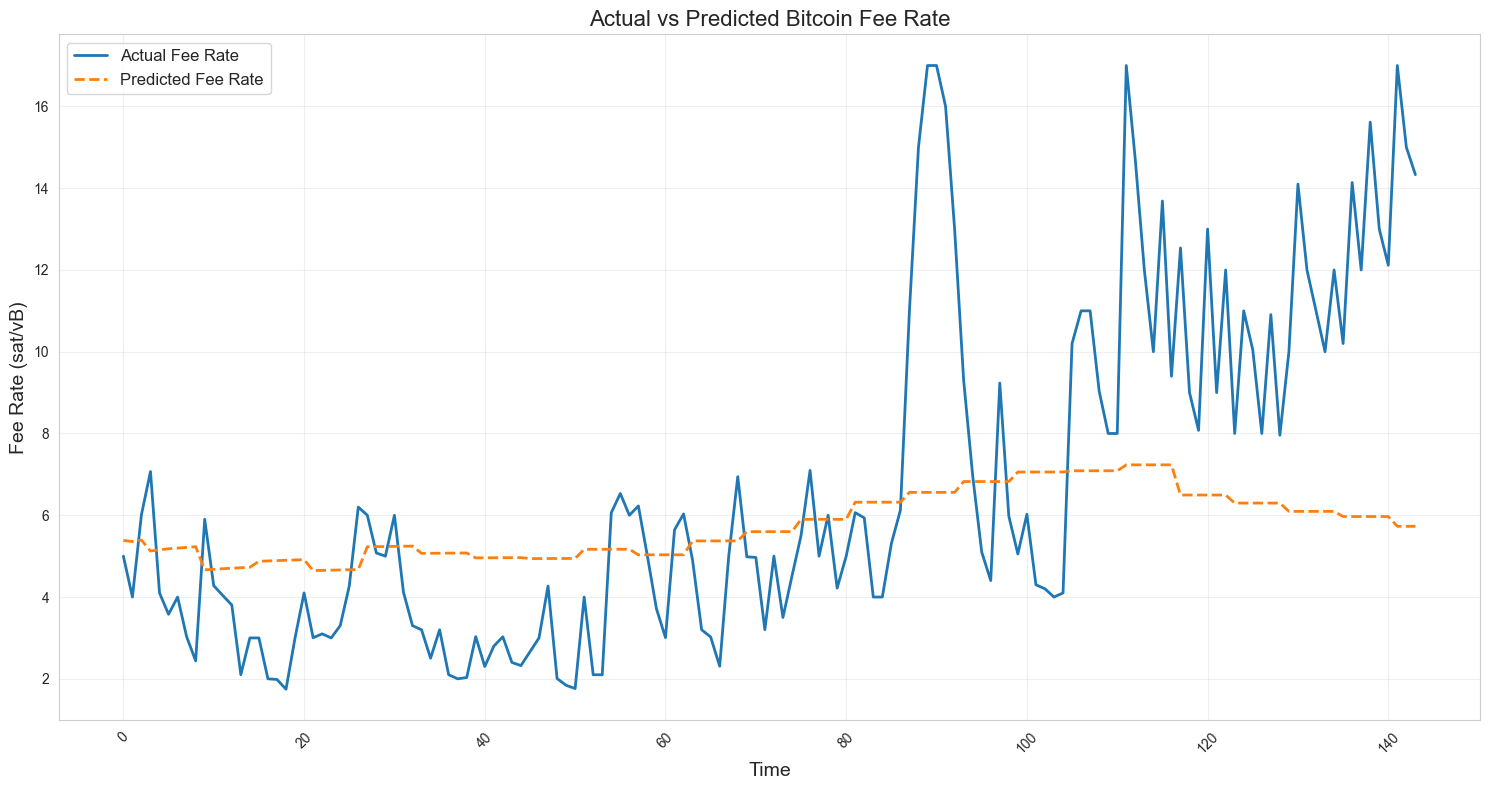

In [18]:
sf=pd.read_csv('test.csv')
actual_values = sf['block_median_fee_rate']
predicted_values = predictions_df['predicted_fee_rate']

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
theils_u = theil_u(actual_values, predicted_values)
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Theil's U Statistic: {theils_u:.4f}")

plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(actual_values.index, actual_values, label='Actual Fee Rate',  linewidth=2)

# Plot predicted values
plt.plot(actual_values.index, predicted_values, label='Predicted Fee Rate',linestyle='--', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted Bitcoin Fee Rate', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Fee Rate (sat/vB)', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add grid for better visualization
plt.grid(alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
